In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="NanumGothicCoding")

In [2]:
df = pd.read_csv("../../data/seoul_apart_02.csv")
df.head()

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.12,220000,4,1987.0,강남구,개포동,중형,4,화,9079.65
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202204,2022.4.21,220000,2,1987.0,강남구,개포동,중형,4,목,9079.65
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,24.23,202205,2022.5.27,216000,2,1987.0,강남구,개포동,중형,5,금,8914.57
3,서울특별시 강남구 개포동,개포래미안포레스트,31.01,202204,2022.4.1,369000,13,2020.0,강남구,개포동,대형,4,금,11899.39
4,서울특별시 강남구 개포동,개포래미안포레스트,41.23,202205,2022.5.2,420000,17,2020.0,강남구,개포동,대형,5,월,10186.76


<AxesSubplot:xlabel='거래금액(만원)', ylabel='Count'>

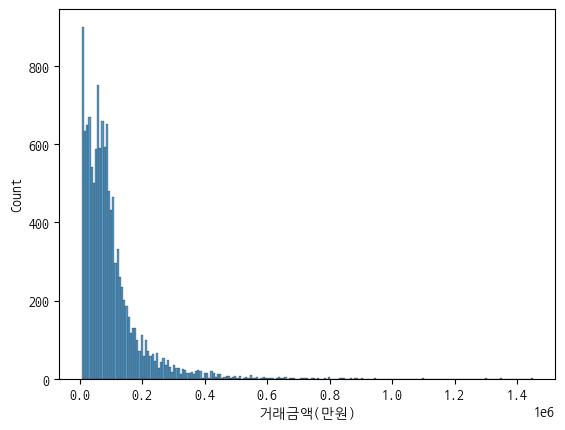

In [3]:
# 2022년 한해동안 서울에서 거래된 전체 매물의 거래금액을 히스토그램을 시각화

sns.histplot(data = df, x = "거래금액(만원)")

In [4]:
# 데이터의 "계약월" 컬럼을 통해 각 월별 부동산 거래의 평당금액 평균값 확인
df.groupby("계약월")[["평당금액"]].mean()

,평당금액
계약월,
1,4462.213910
2,4438.818763
3,4711.707969
4,4980.187903
5,4644.528567
6,4733.806339
7,4451.753745
8,4197.408477
9,3906.256034


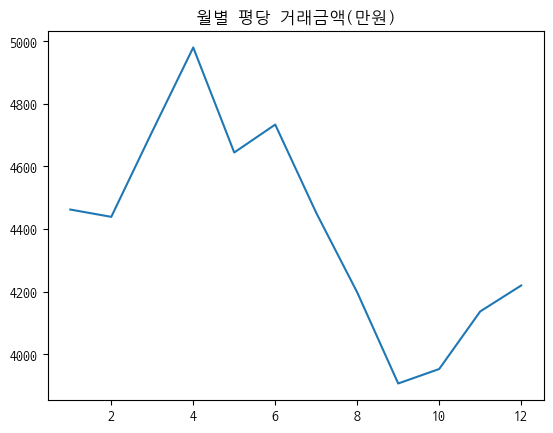

In [5]:
month_price = df.groupby("계약월")[["평당금액"]].mean()

plt.title("월별 평당 거래금액(만원)")
plt.plot(month_price["평당금액"])
plt.show()

<AxesSubplot:xlabel='계약월', ylabel='count'>

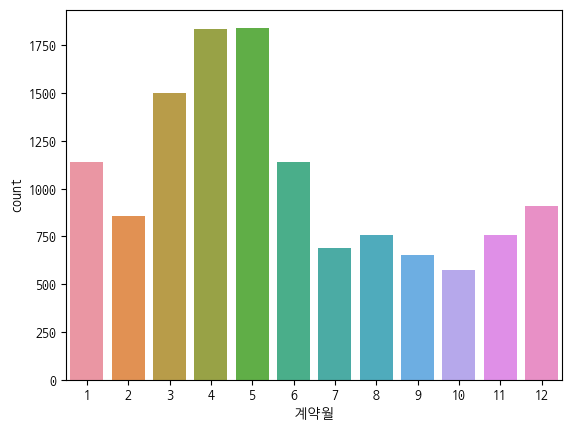

In [6]:
sns.countplot(data = df, x = "계약월")

<AxesSubplot:xlabel='평당금액', ylabel='Count'>

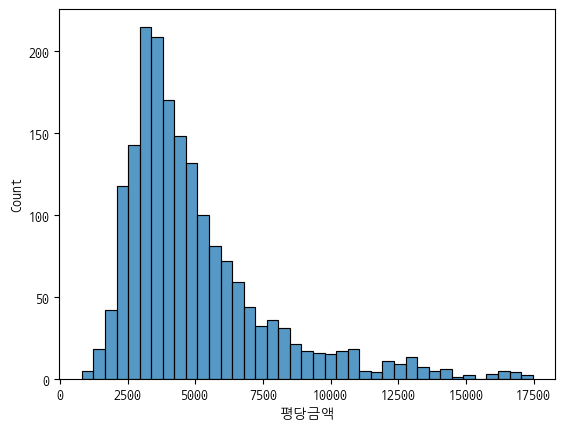

In [7]:
# 4월의 경우 거래량과 거래된 매물의 평당금액이 모두 상위권임
# 4월데 거래된 매물의 평당금액의 분포를 시각화

sns.histplot(data = df[df["계약월"] == 4], x = "평당금액")

Text(0, 0.5, '평당금액')

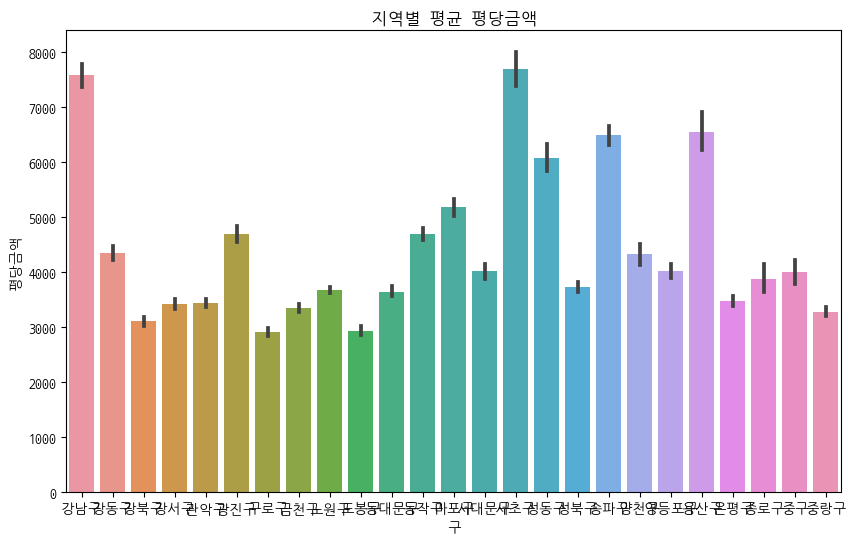

In [8]:
# 지역(구)별 거래금액 비교

plt.figure(figsize = (10,6))
plt.title("지역별 평균 평당금액")
sns.barplot(data = df, x = "구", y = "평당금액")
plt.ylabel("평당금액")

In [9]:
# 아파트의 면적에 따라 분류되어있는 "유형"컬럼을 이용하여 원 그래프 시각화
type_ratio = df["유형"].value_counts()
type_ratio

소형     6784
중형     3995
대형     1617
중대형     255
Name: 유형, dtype: int64

([<matplotlib.patches.Wedge at 0x1d87ff09a00>,
 [Text(-0.12497357867917785, 1.0928776713942505, '소형'),
  Text(-0.37823218808776415, -1.0329280768254596, '중형'),
  Text(0.950091148805732, -0.5543706422250412, '대형'),
  Text(1.0977953044066318, -0.06960940757362395, '중대형')],
 [Text(-0.06816740655227882, 0.5961150934877729, '53.6%'),
  Text(-0.20630846622968954, -0.5634153146320687, '31.6%'),
  Text(0.5182315357122174, -0.3023839866682042, '12.8%'),
  Text(0.5987974387672537, -0.03796876776743124, '2.0%')])

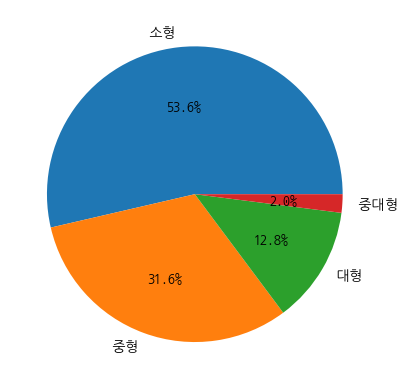

In [10]:
plt.pie(type_ratio, labels = type_ratio.index, autopct = "%1.1f%%")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '강남구'),
  Text(1, 0, '강동구'),
  Text(2, 0, '강북구'),
  Text(3, 0, '강서구'),
  Text(4, 0, '관악구'),
  Text(5, 0, '광진구'),
  Text(6, 0, '구로구'),
  Text(7, 0, '금천구'),
  Text(8, 0, '노원구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '동대문구'),
  Text(11, 0, '동작구'),
  Text(12, 0, '마포구'),
  Text(13, 0, '서대문구'),
  Text(14, 0, '서초구'),
  Text(15, 0, '성동구'),
  Text(16, 0, '성북구'),
  Text(17, 0, '송파구'),
  Text(18, 0, '양천구'),
  Text(19, 0, '영등포구'),
  Text(20, 0, '용산구'),
  Text(21, 0, '은평구'),
  Text(22, 0, '종로구'),
  Text(23, 0, '중구'),
  Text(24, 0, '중랑구')])

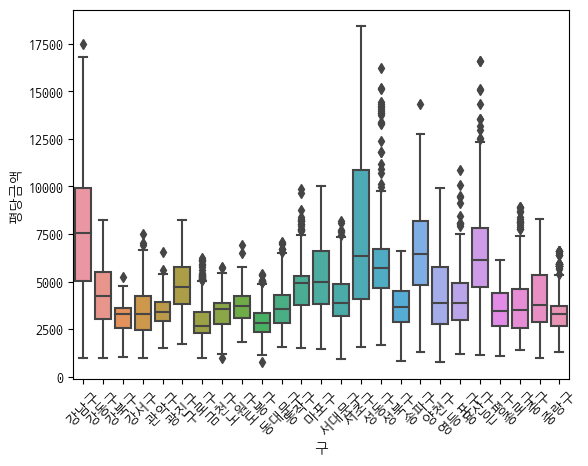

In [11]:
## 박스플롯을 이용해서 지역구별 평당금액의 분포 및 이상치 확인 
sns.boxplot(data = df, x = "구", y = "평당금액")
plt.xticks(rotation = 45)

In [12]:
# 성동구의 경우 다른 지역들보다 상한 이상치가 굉장히 많은 것을 확인
# IQR 활용 
q1=df[df["구"]=="성동구"]["평당금액"].quantile(0.25) # 25% 분위수
q3=df[df["구"]=="성동구"]["평당금액"].quantile(0.75) # 75% 분위수
boundary=(q3-q1)*1.5 # 데이터의 정상 범위

df[(df["구"]=="성동구") & (df["평당금액"]>q3+boundary)].head()

,시군구,단지명,전용면적(평),계약년월,계약일,거래금액(만원),층,건축년도,구,동,유형,계약월,계약요일,평당금액
8284,서울특별시 성동구 성수동1가,갤러리아포레,73.31,202204,2022.4.28,785000,24,2011.0,성동구,성수동1가,대형,4,목,10707.95
8285,서울특별시 성동구 성수동1가,갤러리아포레,66.02,202206,2022.6.3,880000,42,2011.0,성동구,성수동1가,대형,6,금,13329.29
8293,서울특별시 성동구 성수동1가,신장미,20.81,202204,2022.4.6,227000,2,1983.0,성동구,성수동1가,중형,4,수,10908.22
8297,서울특별시 성동구 성수동1가,아크로서울포레스트,50.06,202204,2022.4.13,620000,6,2020.0,성동구,성수동1가,대형,4,수,12385.14
8298,서울특별시 성동구 성수동1가,아크로서울포레스트,80.17,202209,2022.9.30,1300000,47,2020.0,성동구,성수동1가,대형,9,금,16215.54


<AxesSubplot:xlabel='전용면적(평)', ylabel='거래금액(만원)'>

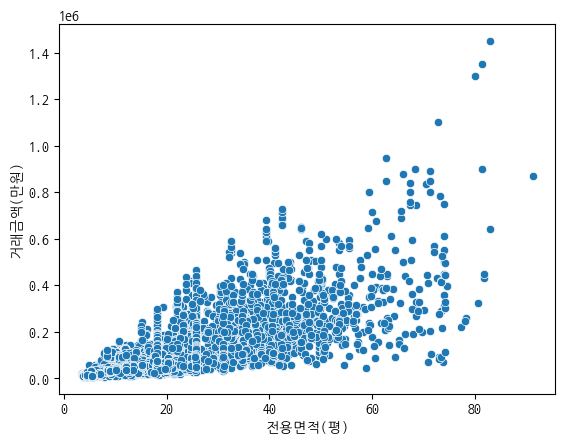

In [13]:
# 전용면적(평)과 거래금액(만원)을 상관관계를 산점도로 확인

sns.scatterplot(data = df, x = "전용면적(평)", y = "거래금액(만원)")

<AxesSubplot:>

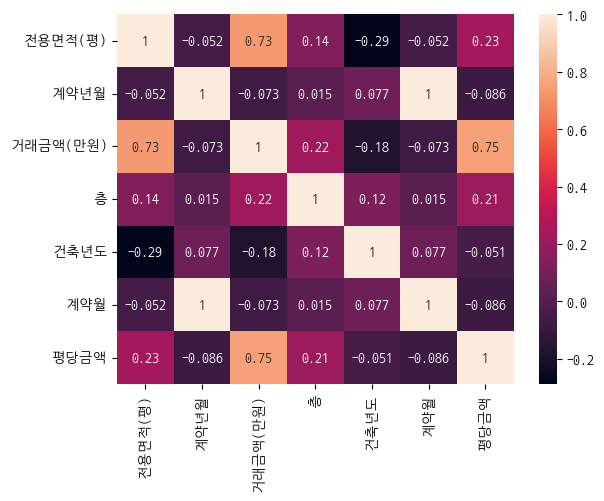

In [16]:
# 상관관계에 따른 히트맵 시각화 
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)